## affine transformation matrix (the augmented matrix in equation)

\begin{equation}
    \begin{bmatrix}
        v_x\\
        v_y\\
        1
    \end{bmatrix}
    =
    \begin{bmatrix}
        c & 0 & l\\
        0 & -c & t\\
        0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        r_x\\
        r_y\\
        1
    \end{bmatrix}
\end{equation}

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import pandas as pd
import matplotlib

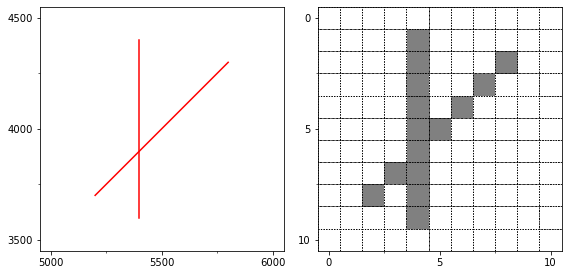

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].set_aspect("equal")
axes[0].set_xlim(4950, 6050)
axes[0].set_ylim(3450, 4550)
axes[0].set_xticks(np.arange(5000,6100,500)) 
axes[0].set_xticks(np.arange(5000,6100,250), minor=True) 
axes[0].set_yticks(np.arange(3500,4600,500)) 
axes[0].set_yticks(np.arange(3500,4600,250), minor=True) 
lines = [(5200, 5800), (3700, 4300), "red", 
         (5400, 5400), (4400, 3600), "red"]
axes[0].plot(*lines)


a = np.zeros((11,11))
a[1:10, 4] = 1
a[np.arange(2, 9), np.arange(8,1,-1)] = 1

axes[1].set_xticks(np.arange(0,11,5)) 
axes[1].set_xticks(np.arange(0,11,2.5), minor=True)
axes[1].set_yticks(np.arange(0,11,5)) 
axes[1].set_yticks(np.arange(0,11,2.5), minor=True)
axes[1].set_aspect("equal")

levels = [0, 1, 2]
colors = ['white', 'grey']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

axes[1].imshow(a, cmap=cmap, interpolation='none', vmin=0, vmax=1, aspect='equal')

def rect(pos, axisid=1, background=False):
    if background is False:
        r = plt.Rectangle(pos-0.5, 1, 1, facecolor="none", edgecolor="k", linewidth=2, linestyle="--")
    else:
        r = plt.Rectangle(pos-0.5, 1, 1, facecolor="none", edgecolor="k", linewidth=1, linestyle=":")
    axes[axisid].add_patch(r)

x, y = np.meshgrid(np.arange(a.shape[1]), np.arange(a.shape[0]))

m = np.c_[x[a.astype(bool)], y[a.astype(bool)]]

b = np.ones((11,11))
n = np.c_[x[b.astype(bool)], y[b.astype(bool)]]

for pos in n:
    rect(pos, background=True)
    
# vectors = np.array([(5200, 3700, 1), (5800, 4300, 1), (5400, 4400, 1), (5400, 3600, 1)])
# vectors = vectors.transpose()

# affine_mtx = np.array([[100, 0, 5000],
#                        [0, -100, 4500],
#                        [0, 0, 1]])
# result = np.linalg.inv(affine_mtx).dot(vectors)

plt.tight_layout()
fig.savefig("./affine.png", dpi=600)